In [ ]:
!pip install --quiet geoplot

In [74]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
from shapely.geometry import Polygon

In [75]:
#import APU data
df = pd.read_excel("LTCH_2023Q3_240325_Summary.xlsx", sheet_name="LTCH_2023Q3_240325_Main")

#import US map
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

In [76]:
#clean up State data
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
contiguous_usa['State_ABR'] = contiguous_usa['state'].replace(us_state_to_abbrev)



In [77]:
# Get all State values and create a DF with unique States
unique_df = pd.DataFrame({'State': df['State'].drop_duplicates().reset_index(drop=True)})
unique_df.head()


,State
0,AL
1,AK
2,AZ
3,AR
4,CA


In [78]:
# Calculate counts where BestMeetAPU is equal to Yes for each State
count_df = df[df['BestMeetAPU'] == 'Yes'].groupby('State').size().reset_index(name='BestMeetAPU_Yes')
count_df.head()

,State,BestMeetAPU_Yes
0,AK,1
1,AL,6
2,AR,8
3,AZ,5
4,CA,19


In [92]:
# Merge the two DataFrames based on the 'State' column
unique_state_count_df = unique_df.merge(count_df, on='State')

#merge unique_state_count_df with contiguous_usa
apu_df = contiguous_usa.merge(unique_state_count_df, left_on="State_ABR", right_on="State",how="left").fillna(0)

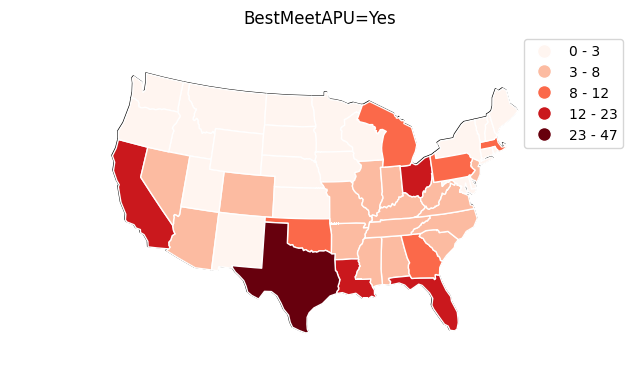

In [153]:

#print plot of BestMeetAPU equal to Yes
ax = gplt.polyplot(apu_df, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  apu_df,
  hue="BestMeetAPU_Yes",
  edgecolor="white",
  linewidth=1,
  cmap="Reds",
  legend=True,
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

ax.set_title("BestMeetAPU=Yes")
plt.show()

In [94]:
# Calculate counts where BestMeetAPU is equal to No for each State
count_no_df = df[df['BestMeetAPU'] == 'No'].groupby('State').size().reset_index(name='BestMeetAPU_No')
count_no_df.head()

,State,BestMeetAPU_No
0,AL,1
1,CA,1
2,LA,2
3,MA,2
4,MD,1


In [112]:
# Merge the two DataFrames based on the 'State' column
unique_state_count_no_df = unique_df.merge(count_no_df, on='State')
unique_state_count_no_df.head()

#merge unique_state_count_df with contiguous_usa
apu_no_df = contiguous_usa.merge(unique_state_count_no_df, left_on="State_ABR", right_on="State",how='left')
#fill NAN with 0
apu_no_df['BestMeetAPU_No'] = apu_no_df['BestMeetAPU_No'].fillna(0).astype(int)


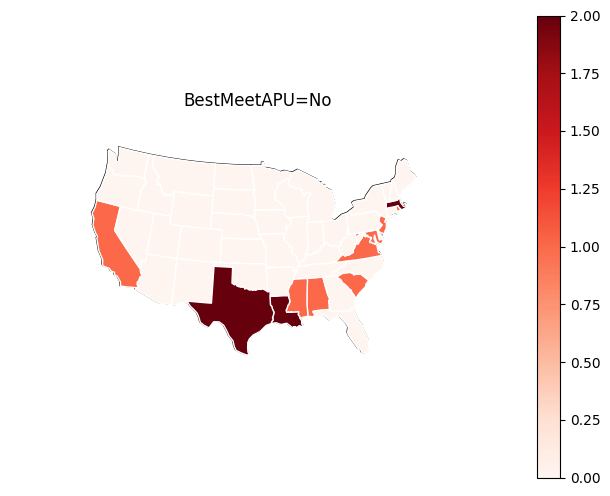

In [152]:

#print plot of BestMeetAPU equal to No
ax = gplt.polyplot(apu_no_df, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  apu_no_df,
  hue="BestMeetAPU_No",
  edgecolor="white",
  linewidth=1,
  cmap="Reds",
  legend=True,
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

ax.set_title("BestMeetAPU=No")
plt.show()